In [1]:
import numpy as np
import scipy
import matplotlib
import snpy
import os
import matplotlib.pyplot as plt

In [2]:
sn_dir=[]
phase=[]
maxJ=[]
err_maxJ=[]
for file in os.listdir():
    if file.endswith("EBV2.snpy"):
        s=snpy.get_sn(file)
        sn_dir+=[file[0:4]]
        if "J" in s.restbands and "Jrc2" in s.restbands:
            if s.J.MJD[0] < s.Jrc2.MJD[0]:
                phase+=[s.J.MJD[0]-s.Tmax]
            else:
                phase+=[s.Jrc2.MJD[0]-s.Tmax]
            maxJ+=[s.get_max("J","Jrc2")[1]]
            err_maxJ+=[s.get_max("J","Jrc2")[2]]
        elif "Jrc2" in s.restbands:
            phase+=[s.Jrc2.MJD[0]-s.Tmax]
            maxJ+=[s.get_max("Jrc2")[1]]
            err_maxJ+=[s.get_max("Jrc2")[2]]
        else:
            phase+=[s.J.MJD[0]-s.Tmax]
            maxJ+=[s.get_max("J")[1]]
            err_maxJ+=[s.get_max("J")[2]]

In [3]:
sn_dir_2=[]
phase_2=[]
maxJ_2=[]
err_maxJ_2=[]
for file in os.listdir():
    if file.endswith("JandT.snpy"):
        s=snpy.get_sn(file)
        sn_dir_2+=[file[0:4]]
        if "J" in s.restbands and "Jrc2" in s.restbands:
            if s.J.MJD[0] < s.Jrc2.MJD[0]:
                phase_2+=[s.J.MJD[0]-s.Tmax]
            else:
                phase_2+=[s.Jrc2.MJD[0]-s.Tmax]
            maxJ_2+=[s.get_max("J","Jrc2")[1]]
            err_maxJ_2+=[s.get_max("J","Jrc2")[2]]
        elif "Jrc2" in s.restbands:
            phase_2+=[s.Jrc2.MJD[0]-s.Tmax]
            maxJ_2+=[s.get_max("Jrc2")[1]]
            err_maxJ_2+=[s.get_max("Jrc2")[2]]
        else:
            phase_2+=[s.J.MJD[0]-s.Tmax]
            maxJ_2+=[s.get_max("J")[1]]
            err_maxJ_2+=[s.get_max("J")[2]]

In [4]:
print(len(phase))
print(len(err_maxJ))

91
91


In [5]:
def large_error(error,values,direct):
    cutting=[]
    cut_err=[]
    for i in range(0,len(direct)):
        if values[i] > error:
            cutting+=[direct[i]]
            cut_err+=[values[i]]
    return cutting, cut_err

def phasor(error,values,direct):
    cutting=[]
    cut_err=[]
    for i in range(0,len(direct)):
        if values[i] < error:
            cutting+=[direct[i]]
            cut_err+=[values[i]]
    return cutting, cut_err

In [6]:
max_sn_over=large_error(0.2,err_maxJ_2,sn_dir_2)[0]
max_err_over=large_error(0.2,err_maxJ_2,sn_dir_2)[1]
print(max_sn_over)
print(max_err_over)
EBV_sn_over=large_error(0.2,err_maxJ,sn_dir)[0]
EBV_err_over=large_error(0.2,err_maxJ,sn_dir)[1]
print(EBV_sn_over)
print(EBV_err_over)

['05ag', '05na', '07jd']
[0.5431546, 0.86428964, 0.34747624]
['09P_', '07ai', '08hu', '06ej', '08gg', '05hj', '06is', '07jd', '09I_', '08bq', '09F_', '05na', '05ag']
[0.5095654, 0.5189551, 2.6292062, 0.29610643, 0.35736358, 203.10342, 0.2281531, 0.6410778, 0.24319118, 0.25398156, 3.4842513, 1.2250973, 1.4037579]


In [7]:
print(len(phasor(10,phase,sn_dir)[0]))
print(len(phase))

81
91


Text(0, 0.5, 'error in max J-band magnitude')

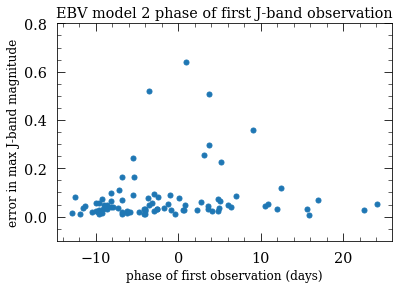

In [8]:
plt.errorbar(phase,err_maxJ,ms=5,fmt='o')
plt.ylim([-0.1,0.8])
plt.title("EBV model 2 phase of first J-band observation")
plt.xlabel("phase of first observation (days)")
plt.ylabel("error in max J-band magnitude")

Text(0, 0.5, 'error in max J-band magnitude')

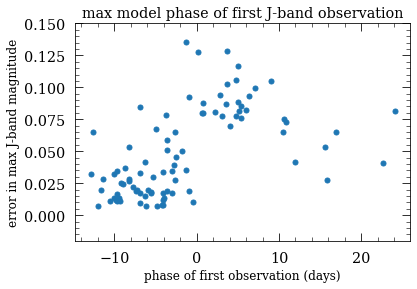

In [9]:
plt.errorbar(phase_2,err_maxJ_2,ms=5,fmt='o')
plt.ylim([-0.02,0.15])
plt.title("max model phase of first J-band observation")
plt.xlabel("phase of first observation (days)")
plt.ylabel("error in max J-band magnitude")

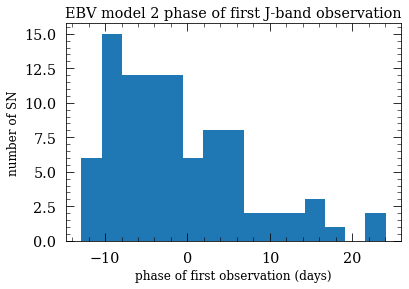

In [10]:
plt.hist(phase, bins=15)
plt.title("EBV model 2 phase of first J-band observation")
plt.xlabel("phase of first observation (days)")
plt.ylabel("number of SN")
plt.show()

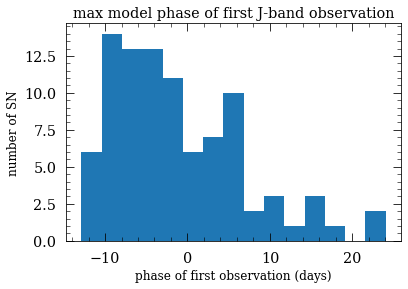

In [11]:
plt.hist(phase_2, bins=15)
plt.title("max model phase of first J-band observation")
plt.xlabel("phase of first observation (days)")
plt.ylabel("number of SN")
plt.show()

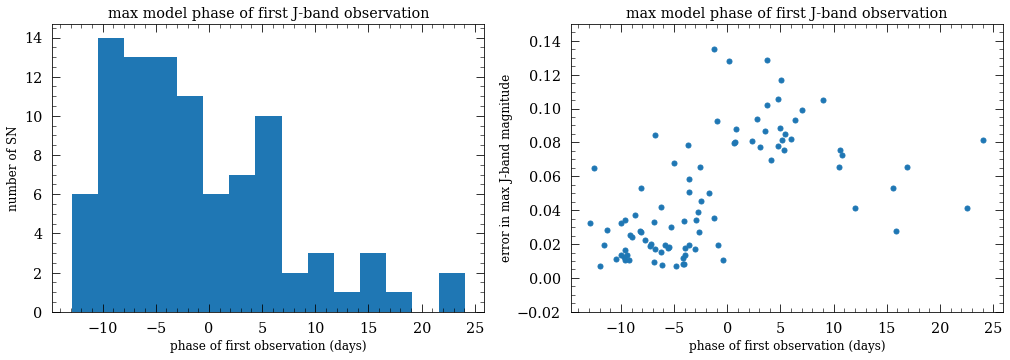

In [13]:
plt.figure(1).add_axes((0,0,1,1))
plt.hist(phase_2, bins=15)
plt.title("max model phase of first J-band observation")
plt.xlabel("phase of first observation (days)")
plt.ylabel("number of SN")

plt.figure(1).add_axes((1.2,0,1,1))
plt.errorbar(phase_2,err_maxJ_2,ms=5,fmt='o')
plt.ylim([-0.02,0.15])
plt.title("max model phase of first J-band observation")
plt.xlabel("phase of first observation (days)")
plt.ylabel("error in max J-band magnitude")


plt.show()